# Illustration of a noise model

To create noise simulation on a track, we use the same method describes in *Create realistic synthetic track* Notebook and dont l'approche is described in [Ripley (2009)] and also employed in [Ménéroux (2022)]. 

This tutorial is going to illustrate of the noise model on a 30-meter-radius continuous circle, on a piecewise linear building with a diameter of 10 meter and on a path with a length of approximately 300 meters. 

To generate noise simulation in tracklib, you need to create a kernel with a scope and then apply the noise method to a track by configure the amplitude:
<br/>
<div class="alert alert-block alert-info" style="padding:1em">
    
```python
  kernel = tkl.GaussianKernel(50)
  amplitude = 2
  noised_track = track.noise(amplitude, kernel)
```
</div>

<br/>

<div>
<b>References:</b><ul>
<li>[Ripley (2009)] - Ripley, B.D., 2009. Stochastic simulation. vol. 316. Hoboken, NJ: John Wiley & Sons.</li>
<li>[Ménéroux (2022)] - Méneroux, Y., Maidaneh Abdi, I., Le Guilcher, A., & Olteanu-Raimond, A. M. (2022). Is the radial distance really a distance? An analysis of its properties and interest for the matching of polygon features. International Journal of Geographical Information Science, 37(2), 438–475. https://doi.org/10.1080/13658816.2022.2123487</li>
</ul>    
</div>

<br/>

## As usual, let's start by defining our environment

The first task is only useful for the online notebook and import the local tracklib code source. It's not necessary if tracklib is installed from PyPI.

In [1]:
import matplotlib.pyplot as plt
import os.path
import sys

#-------------------------------------------------------
# Import de tracklib
module_path = os.path.abspath(os.path.join('../../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import tracklib as tkl

The following two imports are necessary for the tutorial:

In [2]:
import math
import matplotlib.pyplot as plt
from random import random, randint

## Loading a building, a circle and a path

Generated track from 02/11/2025 12:03:04 to 02/11/2025 13:03:04 [720 pts, 62.83m]
Generated track from 20/07/2046 04:48:07 to 20/07/2046 05:48:07 [100 pts, 147.76m]


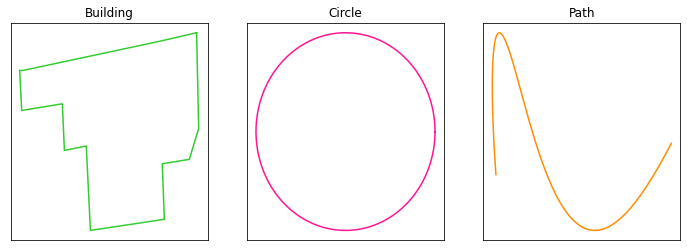

In [3]:
# ----------------------------------------------------------
# The building
param = tkl.TrackFormat({'ext': 'WKT', 'id_wkt': 0, 'separator': ',', 'header': 1})
batis = tkl.TrackReader.readFromFile("../../../data/radial/bati_bdtopo.wkt", param)
#bati1 = batis[234]
bati = batis[305]

# ----------------------------------------------------------
# The circle
def x_t(t):
    return 10*math.cos(2*math.pi*t)
def y_t(t):
    return 10*math.sin(2*math.pi*t)
circle = tkl.generate(x_t, y_t, dt=5)
tkl.resample(circle, 0.1, 1, 1)
#if not ((circle.getX()[-1] == circle.getX()[0]) and (circle.getY()[-1] == circle.getY()[0])):
#    circle.addObs(circle[0])

# ----------------------------------------------------------
# The path
tkl.seed(14380247)
sentier = tkl.generate(0.20)
    
# ----------------------------------------------------------
#   PLOT
COLORS = ['limegreen', 'deeppink', 'darkorange']
def plotData(track, i, title):
    ax = plt.subplot2grid((1, 3), (0, i))
    ax.plot(track.getX(), track.getY(), color=COLORS[i], linestyle='-')
    ax.set_title(title)
    ax.set_xticks([])
    ax.set_yticks([])

plt.figure(figsize=(12, 4))
plotData(bati, 0, 'Building')
plotData(circle, 1, 'Circle')
plotData(sentier, 2, 'Path')
plt.show()

## Generate noise

On the code below, the correlation scope is around 10 m, meaning that, in a logarithmic scale a value of -1 corresponds to 1m ($10^{-1}*10m$) while a value of 2 corresponds to 1000m ($10^2*10m$).

We will vary the covariance scope from 0.1 (white noise process) to 500 m (global translation), for a same amplitude level of 5 meters. 

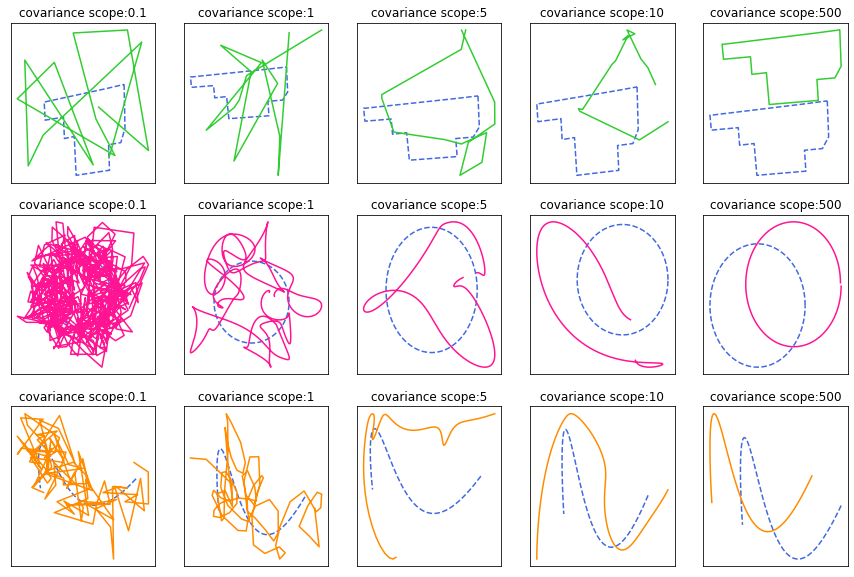

In [4]:
tkl.seed(123)

# ----------------------------------------------------------
#   NOISE

N = 5
SCOPES = [0.1, 1, 5, 10, 500]
amplitude = 5

BATIS = []
CIRCLES = []
SENTIERS = []
for i in range(N):
    kernel = tkl.GaussianKernel(SCOPES[i])
    
    BATIS.append(bati.noise(amplitude, kernel))
    CIRCLES.append(circle.noise(amplitude, kernel))
    SENTIERS.append(sentier.noise(amplitude, kernel))

# ----------------------------------------------------------
#   PLOT

COLORS = ['limegreen', 'deeppink', 'darkorange']
def plotDataWithNoise(data, DATAS, i):
    for (j,d) in enumerate(DATAS):
        ax = plt.subplot2grid((3, N), (i, j))
        ax.set_title('covariance scope:' + str(SCOPES[j]))
        ax.plot(data.getX(), data.getY(), color="royalblue", linestyle='--')
        ax.plot(d.getX(), d.getY(), color=COLORS[i], linestyle='-')
        ax.set_xticks([]) 
        ax.set_yticks([]) 


plt.figure(figsize=(3*N, 2*N))
plotDataWithNoise(bati, BATIS, 0)
plotDataWithNoise(circle, CIRCLES, 1)
plotDataWithNoise(sentier, SENTIERS, 2)
plt.show()
